<center><h1>Adult Income Analysis</h1></center>
<center><h2>May 16, 2021</h2></center>

<h2>Contents</h2>
<h3><ol>
    <li>Import Libraries and Data</li><br>
    <li>Preliminary Data Analysis</li><br>
    <li>Data Wrangling</li><br>
    <li>Data Visualization</li><br>
    <li>Data Preprocessing</li><br>
    <li>Modeling</li><br>
    <li>Best Features</li><br>
    <li>Conclusion</li>
</ol></h3>

<h2>1. Import Libraries and Data</h2>

In [1]:
#import needed libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import tree, metrics
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import scale

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [2]:
#import data
income = pd.read_csv('adult.csv')

<h2>2. Preliminary Data Analysis</h2>
<h3>2a. Columns and types</h3>

In [3]:
income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


<h3>2b. Data</h3>

In [4]:
income.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


<h3>2c. Summary Statistics</h3>

In [5]:
income.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


<h2>3. Data Wrangling</h2>
<h3>3a. Find proportions of missing values in each category.</h3>

In [6]:
#Find null values
income.isnull().sum().values.sum()

0

<p>Examining the data, it seems question marks indicate missing values. Using .isnull() to check for missing values didn't turn up any, so I will count the number of values indicated by a question mark.</p>

In [7]:
#Sum up the missing values (indicated by a '?') and find the proportion of each category
#that consists of missing values.
income_missing = pd.concat([(income=='?').sum(), 100 * (income=='?').mean()], axis=1)
income_missing.columns=['Count', '%']
income_missing.sort_values(by=['Count', '%'], ascending=False)

,Count,%
occupation,2809,5.751198
workclass,2799,5.730724
native-country,857,1.754637
age,0,0.000000
fnlwgt,0,0.000000
education,0,0.000000
educational-num,0,0.000000
marital-status,0,0.000000
relationship,0,0.000000
race,0,0.000000


<h3>3b. Count of entries in each category</h3>

In [8]:
income['workclass'].value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

The dominant value in the workclass category is the private sector.

In [9]:
income['education'].value_counts()

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

Among education, most workers have a completed high school education, some college, or a bachelor's degree.

In [10]:
income['occupation'].value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

The occupation value counts are closer together, with specialty professions, craft-repair, and executive-managerial having the highest values.

In [11]:
income['native-country'].value_counts()

United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Nicaragua                        49
Greece                           49
Peru                        

The dominant nationality is the United States.

<h3>3c. Drop missing values</h3>
<p>The missing values for the occupation, workclass, and native-country categories make up less than 6% of the 48,842 entries, so they will be dropped.</p>

In [12]:
#Drop null values for occupation
income.drop(index=income[income['occupation'] == '?'].index, inplace=True)

In [13]:
#Drop null values for workclass
income.drop(index=income[income['workclass'] == '?'].index, inplace=True)

In [14]:
#Drop null values for native-country
income.drop(index=income[income['native-country'] == '?'].index, inplace=True)

<h3>3d. Correlation matrix</h3>

([<matplotlib.axis.YTick at 0x284630dccd0>,
 [Text(0, 0, 'age'),
  Text(0, 1, 'fnlwgt'),
  Text(0, 2, 'educational-num'),
  Text(0, 3, 'capital-gain'),
  Text(0, 4, 'capital-loss'),
  Text(0, 5, 'hours-per-week')])

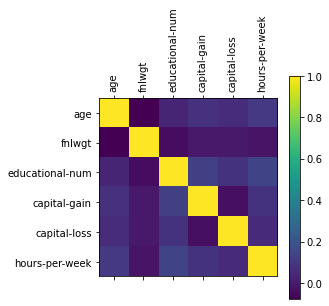

In [15]:
#Use a correlation matrix to show the correlations between the continuous values and income.
plt.matshow(income.corr())
plt.colorbar()
plt.xticks(np.arange(len(income.corr().columns)), income.corr().columns.values, rotation = 90) 
plt.yticks(np.arange(len(income.corr().columns)), income.corr().columns.values) 

The correlation matrix above shows very low linear correlations between the continuous features and income. The highest correlations are between hours-per-week and educational-num.

In [16]:
# Convert income column into numerical classes
# Create a new column for income that shows '1' for incomes greater than $50K and '0' for incomes that are not

income['Income_Above_or_Below_50K'] = income.apply(lambda row: 1 if '>50K' in row['income'] else 0, axis=1)

The columns 'finalwgt', 'capital-gain', 'capital-loss', 'native-country', and 'income' are not useful for this analysis, so they will be dropped.

In [17]:
# Remove unwanted columns
income = income.drop(['fnlwgt', 'capital-gain', 'capital-loss', 'native-country', 'income'], axis=1)
income.head()

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,Income_Above_or_Below_50K
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,40,0
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,0
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,40,1
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,1
5,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,30,0


<h2>4. Data Visualization</h2>
<h3>4.1 Comparing income by education level</h3>

In [18]:
#Make a dictionary pairing the education level with its corresponding number
edu_level = {}
for x,y in income[['educational-num','education']].drop_duplicates().itertuples(index=False):
    edu_level[y] = x

Text(0, 0.5, 'Proportion')

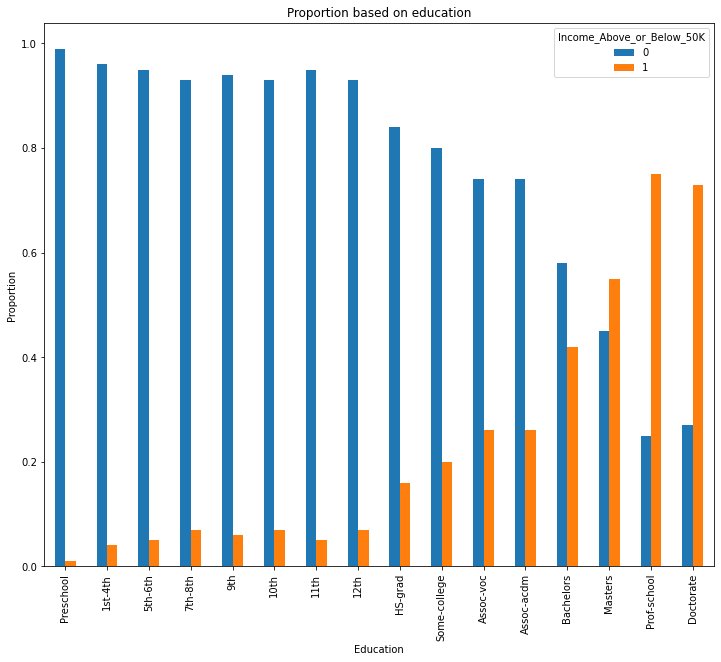

In [19]:
education = round(pd.crosstab(income.education, income.Income_Above_or_Below_50K).div\
                  (pd.crosstab(income.education, income.Income_Above_or_Below_50K).apply(sum,1),0),2)
education = education.reindex(sorted(edu_level, key=edu_level.get, reverse=False))

ax = education.plot(kind ='bar', title = 'Proportion based on education', figsize = (12,10))
ax.set_xlabel('Education')
ax.set_ylabel('Proportion')

As expected, the higher the education level, the greater the proportion of adults with incomes over 50K. From the master's level and up, adults making more than 50K outnumber adults making 50K or less. Let's check the proportion numbers to confirm.

In [20]:
print(education)

Income_Above_or_Below_50K     0     1
education                            
Preschool                  0.99  0.01
1st-4th                    0.96  0.04
5th-6th                    0.95  0.05
7th-8th                    0.93  0.07
9th                        0.94  0.06
10th                       0.93  0.07
11th                       0.95  0.05
12th                       0.93  0.07
HS-grad                    0.84  0.16
Some-college               0.80  0.20
Assoc-voc                  0.74  0.26
Assoc-acdm                 0.74  0.26
Bachelors                  0.58  0.42
Masters                    0.45  0.55
Prof-school                0.25  0.75
Doctorate                  0.27  0.73


The education categories above bachelor's do have a majority earning over 50K.

<h3>4.2. Comparing Income by WorkClass</h3>

Text(0, 0.5, 'Proportion')

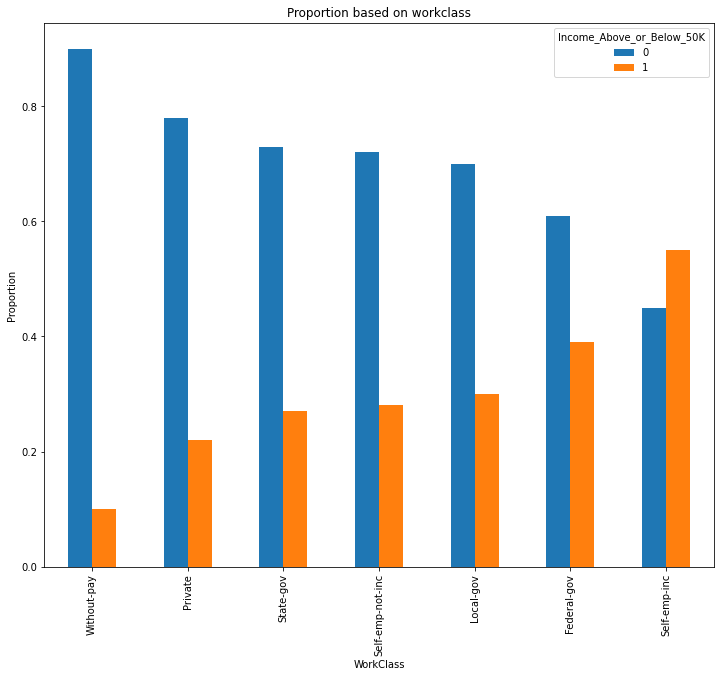

In [21]:
workclass = round(pd.crosstab(income.workclass, income.Income_Above_or_Below_50K).div\
                  (pd.crosstab(income.workclass, income.Income_Above_or_Below_50K).apply(sum,1),0),2)
workclass.sort_values(by = 1, inplace = True)

ax = workclass.plot(kind ='bar', title = 'Proportion based on workclass', figsize = (12,10))
ax.set_xlabel('WorkClass')
ax.set_ylabel('Proportion')

Among the adults with pay, those in the private class have the lowest proportion of incomes over 50K, while those self-employed in incorporated businesses have not only the greatest proportion of incomes over 50K, but adults making more than 50K outnumber those that are not.

In [22]:
print(workclass)

Income_Above_or_Below_50K     0     1
workclass                            
Without-pay                0.90  0.10
Private                    0.78  0.22
State-gov                  0.73  0.27
Self-emp-not-inc           0.72  0.28
Local-gov                  0.70  0.30
Federal-gov                0.61  0.39
Self-emp-inc               0.45  0.55


<h3>4.3. Comparing Income by Occupation</h3>

Text(0, 0.5, 'Proportion')

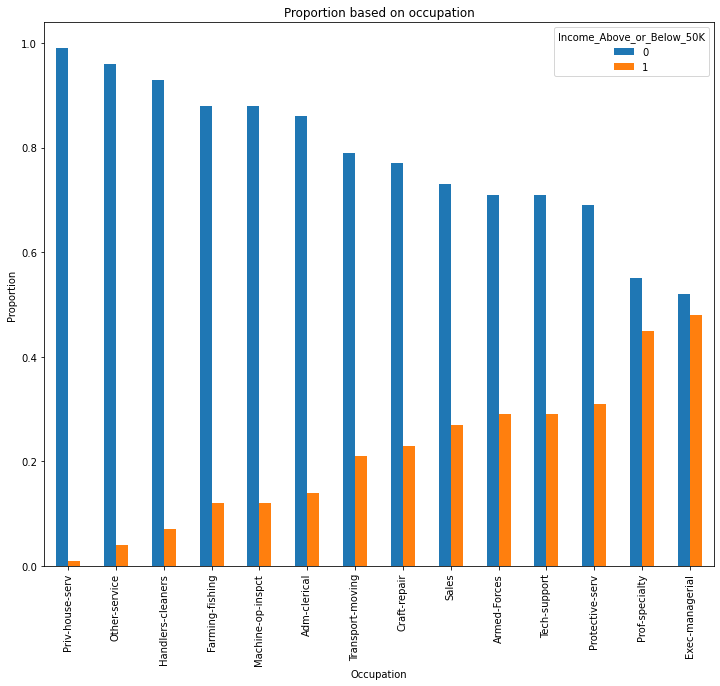

In [23]:
occupation = round(pd.crosstab(income.occupation, income.Income_Above_or_Below_50K).div\
                  (pd.crosstab(income.occupation, income.Income_Above_or_Below_50K).apply(sum,1),0),2)
occupation.sort_values(by = 1, inplace = True)

ax = occupation.plot(kind ='bar', title = 'Proportion based on occupation', figsize = (12,10))
ax.set_xlabel('Occupation')
ax.set_ylabel('Proportion')

All occupations have more adults with incomes $50K or less than adults with greater incomes. The difference is the smallest with executive managerial positions, followed closely by specialized professionals such as doctors and lawyers.

In [24]:
print(occupation)

Income_Above_or_Below_50K     0     1
occupation                           
Priv-house-serv            0.99  0.01
Other-service              0.96  0.04
Handlers-cleaners          0.93  0.07
Farming-fishing            0.88  0.12
Machine-op-inspct          0.88  0.12
Adm-clerical               0.86  0.14
Transport-moving           0.79  0.21
Craft-repair               0.77  0.23
Sales                      0.73  0.27
Armed-Forces               0.71  0.29
Tech-support               0.71  0.29
Protective-serv            0.69  0.31
Prof-specialty             0.55  0.45
Exec-managerial            0.52  0.48


<h3>4.4. Comparing Income by Marital Status</h3>

Text(0, 0.5, 'Proportion')

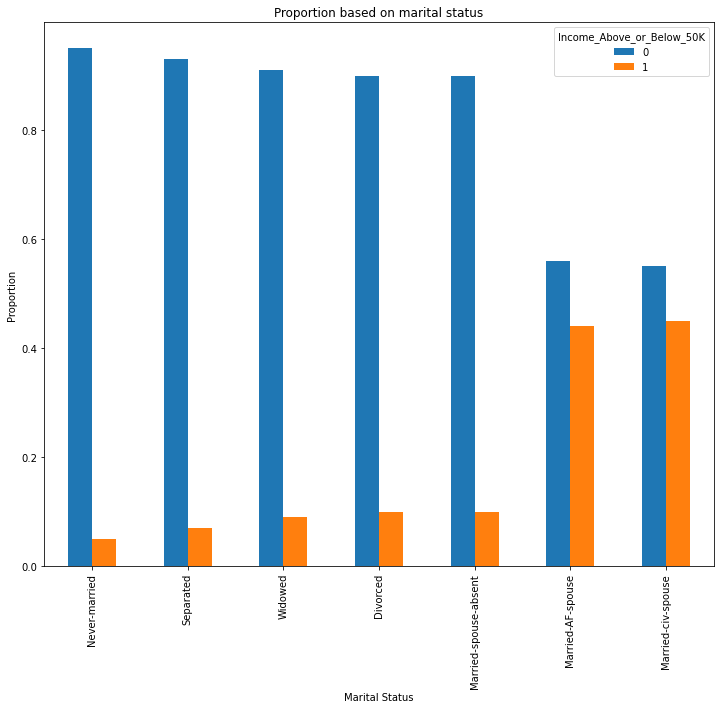

In [25]:
marital = round(pd.crosstab(income['marital-status'], income.Income_Above_or_Below_50K).div\
                  (pd.crosstab(income['marital-status'], income.Income_Above_or_Below_50K).apply(sum,1),0),2)
marital.sort_values(by = 1, inplace = True)

ax = marital.plot(kind ='bar', title = 'Proportion based on marital status', figsize = (12,10))
ax.set_xlabel('Marital Status')
ax.set_ylabel('Proportion')

All categories have more adults with incomes of 50K or less than adults with incomes over 50K, but the gap is much smaller with married couples that have a spouse present.

In [26]:
print(marital)

Income_Above_or_Below_50K     0     1
marital-status                       
Never-married              0.95  0.05
Separated                  0.93  0.07
Widowed                    0.91  0.09
Divorced                   0.90  0.10
Married-spouse-absent      0.90  0.10
Married-AF-spouse          0.56  0.44
Married-civ-spouse         0.55  0.45


<h3>4.5. Comparing Income by Race</h3>

Text(0, 0.5, 'Proportion')

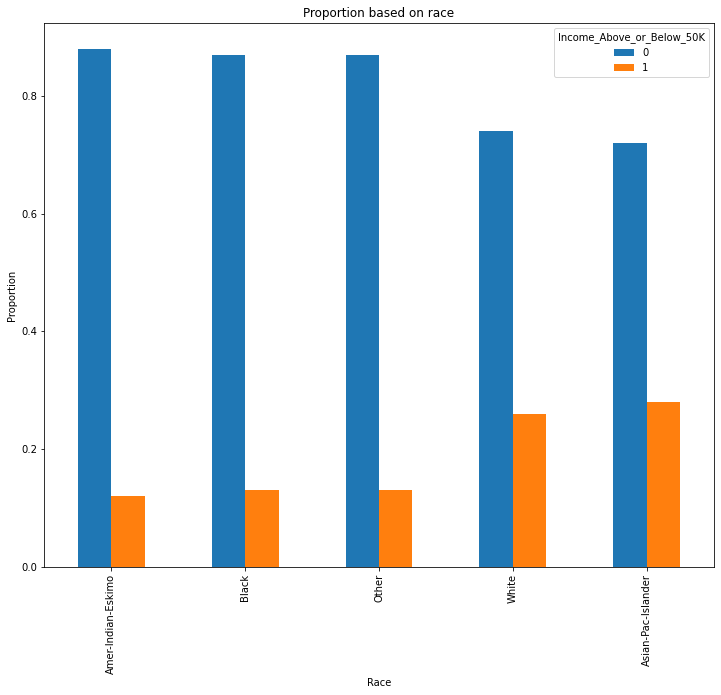

In [27]:
race = round(pd.crosstab(income.race, income.Income_Above_or_Below_50K).div\
                  (pd.crosstab(income.race, income.Income_Above_or_Below_50K).apply(sum,1),0),2)
race.sort_values(by = 1, inplace = True)

ax = race.plot(kind ='bar', title = 'Proportion based on race', figsize = (12,10))
ax.set_xlabel('Race')
ax.set_ylabel('Proportion')

Whites and Asians have higher proportions of adults with incomes over 50K.

In [28]:
print(race)

Income_Above_or_Below_50K     0     1
race                                 
Amer-Indian-Eskimo         0.88  0.12
Black                      0.87  0.13
Other                      0.87  0.13
White                      0.74  0.26
Asian-Pac-Islander         0.72  0.28


<h3>4.6 Comparing Income by Gender</h3>

Text(0, 0.5, 'Proportion')

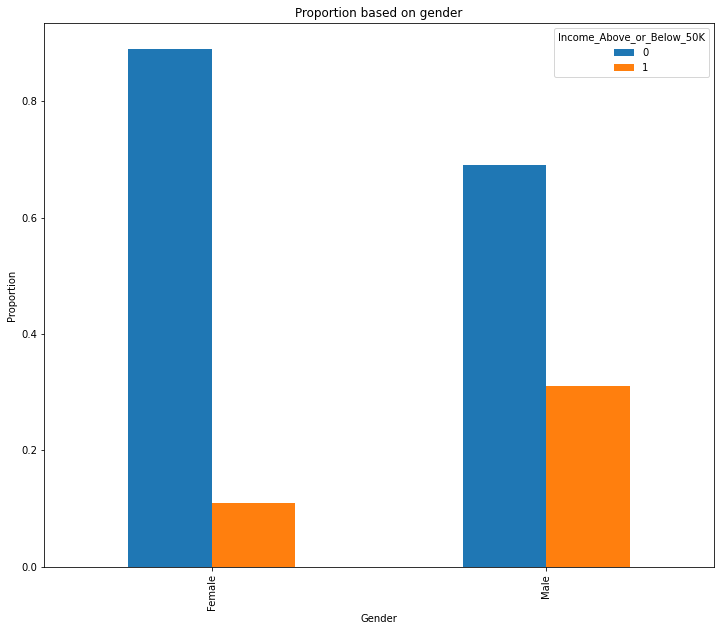

In [29]:
gender = round(pd.crosstab(income.gender, income.Income_Above_or_Below_50K).div\
                  (pd.crosstab(income.gender, income.Income_Above_or_Below_50K).apply(sum,1),0),2)
gender.sort_values(by = 1, inplace = True)

ax = gender.plot(kind ='bar', title = 'Proportion based on gender', figsize = (12,10))
ax.set_xlabel('Gender')
ax.set_ylabel('Proportion')

Men have a higher proportion of incomes over 50K.

In [30]:
print(gender)

Income_Above_or_Below_50K     0     1
gender                               
Female                     0.89  0.11
Male                       0.69  0.31


<h3>4.7 Comparing Income by Hours Per Week</h3>

Text(0, 0.5, 'Proportion')

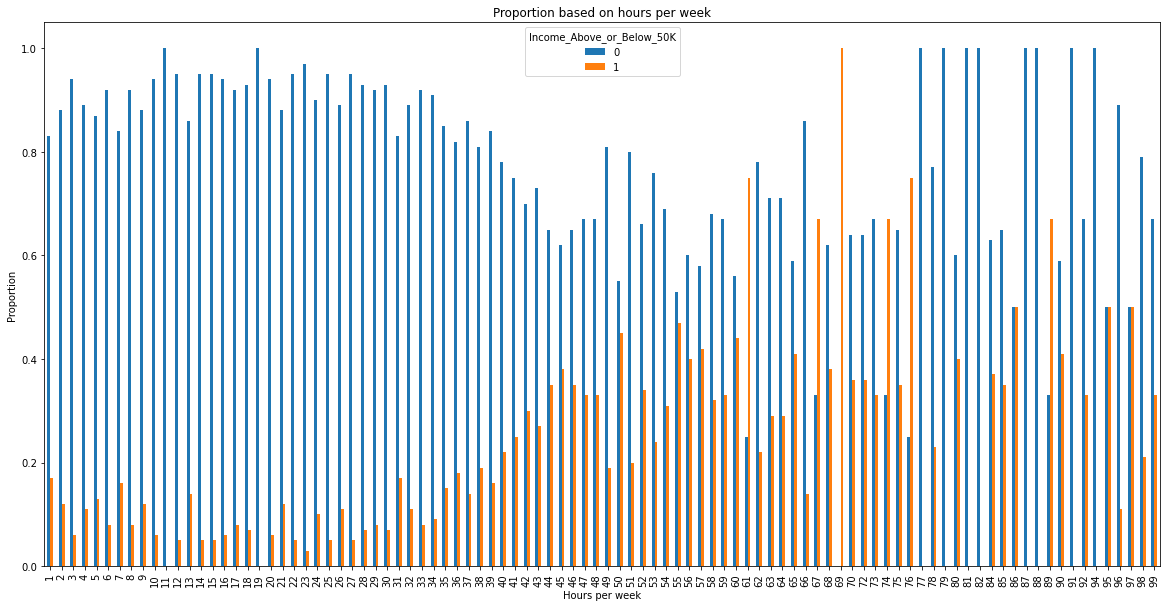

In [31]:
hours_per_week = round(pd.crosstab(income['hours-per-week'], income.Income_Above_or_Below_50K).div\
                  (pd.crosstab(income['hours-per-week'], income.Income_Above_or_Below_50K).apply(sum,1),0),2)

ax = hours_per_week.plot(kind ='bar', title = 'Proportion based on hours per week', figsize = (20,10))
ax.set_xlabel('Hours per week')
ax.set_ylabel('Proportion')

The lowest number of hours worked in which incomes over 50K outnumber incomes of 50K and under is 61. However, more hours worked does not necessarily mean more incomes over 50K than incomes 50K and under. In fact, there are no incomes over 50K at 77, 79, 81, 82, 87, 88, 91, and 94 hours.

<h2>5. Data Preprocessing</h2>
<h3>5.1 One-Hot Encoding</h3>
<p>In one-hot encoding, columns with different categories are represented as binary features for each category. Here, one-hot encoding will be used on the categorical features.</p>

In [32]:
#Unnamed: educational-num is not useful for this analysis, so it will be dropped.
income = income.drop(['educational-num'],axis=1)

In [33]:
#Use one-hot encoding on columns with different categories.
one_hot_labels = income[['workclass', 'education', 'marital-status', 'occupation',\
                         'relationship', 'race', 'gender']]
one_hot_data = pd.get_dummies(one_hot_labels)

income_one_hot = pd.concat([income,one_hot_data],axis=1).drop\
(['workclass','education', 'marital-status','occupation','relationship','race','gender'],axis=1)

<h3>5.2 Scaling</h3>

In [34]:
#Split data into X and y variables and scale X
X = income_one_hot.drop(['Income_Above_or_Below_50K'],axis=1)
#use .ravel() to pass a 1d array instead of column vector
y = income_one_hot['Income_Above_or_Below_50K'].ravel()

X_scaled = scale(X)

In [35]:
#Split data into train and test sets
X_train_lr,X_test_lr,y_train_lr,y_test_lr = train_test_split(X_scaled,y,random_state=42)

<h2>6. Modeling</h2>
<h3>6.1 Logistic Regression</h3>
<p>When trying different models, I first decided on logistic regression, since the dependent variable is binary (less than 50k or not). I tuned the parameters of the model using K-fold cross-validation and grid search, including tuning the regularization parameter C.</p>

In [36]:
from sklearn.model_selection import GridSearchCV

clf=LogisticRegression()
param_grid = {'C': [0.001, 0.1, 1, 10, 100]}

logreg_clf = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
logreg_clf.fit(X_train_lr, y_train_lr)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.1, 1, 10, 100]}, scoring='accuracy')

In [37]:
clf=LogisticRegression(C=logreg_clf.best_params_['C'])
clf.fit(X_train_lr, y_train_lr)
ypred_lr=clf.predict(X_test_lr)
accuracy_score(ypred_lr, y_test_lr)

0.8339819564832832

<h3>6.2 Decision Tree (Entropy)</h3>
<p>I used a decision tree entropy model to minimize the entropy, the uncertainty about which category the data points fall into at a given point, and maximize the information gain, the difference between entropy before and after splitting a particular feature.</p>

In [38]:
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X, y, test_size = 0.25, random_state = 246)

In [39]:
entr_model = tree.DecisionTreeClassifier(criterion="entropy", random_state = 1234)
entr_model.fit(X_train_dt, y_train_dt)
y_pred_dt_e = entr_model.predict(X_test_dt)
y_pred_dt_e = pd.Series(y_pred_dt_e)

In [40]:
print("Model Entropy model no max depth")
print("Accuracy:", round(metrics.accuracy_score(y_test_dt,y_pred_dt_e),4))
print("Balanced accuracy:", round(metrics.balanced_accuracy_score(y_test_dt,y_pred_dt_e),4))
print('Precision:' , round(metrics.precision_score(y_test_dt,y_pred_dt_e),4))
print('Recall:' , round(metrics.recall_score(y_test_dt,y_pred_dt_e),4))
print('F-measure:' , round(metrics.f1_score(y_test_dt,y_pred_dt_e),4))

Model Entropy model no max depth
Accuracy: 0.7891
Balanced accuracy: 0.7057
Precision: 0.5813
Recall: 0.5399
F-measure: 0.5598


<h3>6.3 Decision Tree (Gini)</h3>
<p>I used a decision tree gini model to measure how well a given feature splits the data into categories.</p>

In [41]:
gini_model = tree.DecisionTreeClassifier(criterion="gini", random_state = 1234)
gini_model.fit(X_train_dt, y_train_dt)
y_pred_dt_g = gini_model.predict(X_test_dt)
y_pred_dt_g = pd.Series(y_pred_dt_g)

In [42]:
print("Model Gini impurity model")
print("Accuracy:", round(metrics.accuracy_score(y_test_dt,y_pred_dt_g),4))
print("Balanced accuracy:", round(metrics.balanced_accuracy_score(y_test_dt,y_pred_dt_g),4))
print('Precision:', round(metrics.precision_score(y_test_dt,y_pred_dt_g),4))
print('Recall:', round(metrics.recall_score(y_test_dt,y_pred_dt_g),4))
print('F-measure:' , round(metrics.f1_score(y_test_dt,y_pred_dt_g),4))

Model Gini impurity model
Accuracy: 0.7869
Balanced accuracy: 0.7045
Precision: 0.5757
Recall: 0.5406
F-measure: 0.5576


<h3>6.4 Random Forest (Entropy)</h3>
<p>To account for variability in decision trees and to attempt to get the most accurate prediction with limited over-fitting, I tried the Random Forest model to get the average of the outputs of the decision trees. I set up a Random Forest model with the entropy criterion.</p>

In [43]:
RF = RandomForestClassifier(random_state = 1234, criterion = 'entropy')
RF.fit(X_train_dt, y_train_dt)
y_pred_rfe = RF.predict(X_test_dt)
y_pred_rfe = pd.Series(y_pred_rfe)

In [44]:
print("Random Forest Entropy model")
print("Accuracy:", round(metrics.accuracy_score(y_test_dt,y_pred_rfe),4))
print("Balanced accuracy:", round(metrics.balanced_accuracy_score(y_test_dt,y_pred_rfe),4))
print('Precision:' , round(metrics.precision_score(y_test_dt,y_pred_rfe),4))
print('Recall:' , round(metrics.recall_score(y_test_dt,y_pred_rfe),4))
print('F-measure:' , round(metrics.f1_score(y_test_dt,y_pred_rfe),4))

Random Forest Entropy model
Accuracy: 0.8162
Balanced accuracy: 0.7314
Precision: 0.6501
Recall: 0.563
F-measure: 0.6034


<h3>6.5 Random Forest (Gini)</h3>
<p>I also tried a Random Forest model with the gini criterion.</p>

In [45]:
RF = RandomForestClassifier(random_state = 1234, criterion = 'gini')
RF.fit(X_train_dt, y_train_dt)
y_pred_rfg = RF.predict(X_test_dt)
y_pred_rfg = pd.Series(y_pred_rfg)

In [46]:
print("Random Forest Gini model")
print("Accuracy:", round(metrics.accuracy_score(y_test_dt,y_pred_rfg),4))
print("Balanced accuracy:", round(metrics.balanced_accuracy_score(y_test_dt,y_pred_rfg),4))
print('Precision:' , round(metrics.precision_score(y_test_dt,y_pred_rfg),4))
print('Recall:' , round(metrics.recall_score(y_test_dt,y_pred_rfg),4))
print('F-measure:' , round(metrics.f1_score(y_test_dt,y_pred_rfg),4))

Random Forest Gini model
Accuracy: 0.8143
Balanced accuracy: 0.7277
Precision: 0.647
Recall: 0.5556
F-measure: 0.5978


The random forest entropy model has the highest precision (65%), recall (56.3%), and F-score (60.34%). The logistic regression model has the highest accuracy at 83.39%.

<h2>7. Best Features</h2>

In [47]:
best_feat = np.abs(income_one_hot.corr()['Income_Above_or_Below_50K'])
best_feat_corr = pd.DataFrame(best_feat[:-1]).sort_values('Income_Above_or_Below_50K',ascending=False)
best_feat_corr

,Income_Above_or_Below_50K
Income_Above_or_Below_50K,1.000000
marital-status_Married-civ-spouse,0.446192
relationship_Husband,0.403706
marital-status_Never-married,0.319536
age,0.237040
hours-per-week,0.227199
relationship_Own-child,0.222635
gender_Female,0.215760
occupation_Exec-managerial,0.209176
relationship_Not-in-family,0.195561


Text(0, 0.5, 'Features')

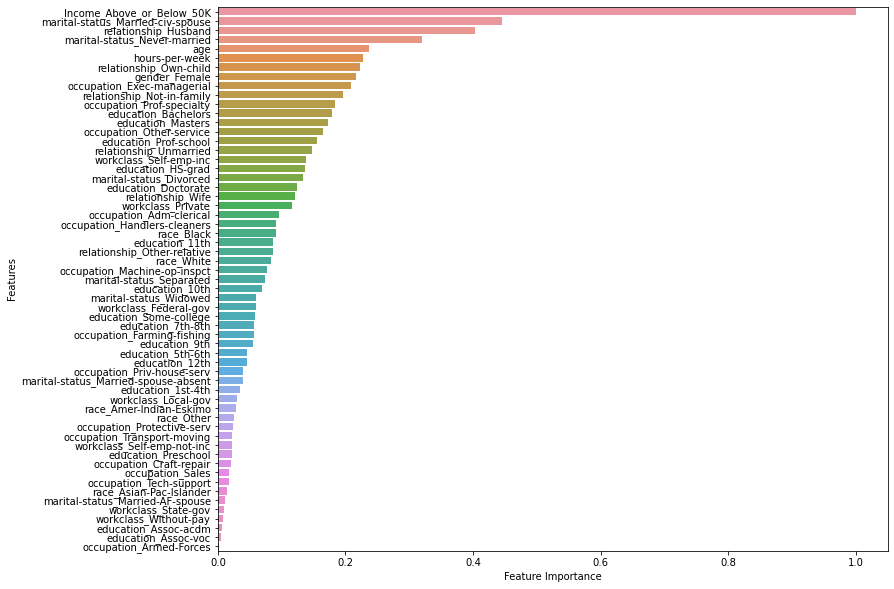

In [48]:
plt.figure(figsize=(12,10))
sns.barplot(x=best_feat_corr['Income_Above_or_Below_50K'], y=best_feat_corr.index)
plt.xlabel('Feature Importance')
plt.ylabel('Features')

Besides the income, which is correlated with itself, the highest values are married-civ-spouse, relationship-Husband, and marital-status-never-married.

<h2>8. Conclusions</h2>
<p>The factors most likely to determine that somebody has an income above 50000 are being married, being a husband, and never being married. Those that are never married likely have more time to put into their jobs and make more money. Married couples tend to have higher incomes because of their combined incomes. Husbands also tend to make more money than their wives.</p>